# CSU EDA v0.2
- 2022-01-01 to present (starts on a saturday)
- DMA split 3 ways:
    - awareness_markets: Orlando, Jacksonville, Greenville, SC and Birmingham
    - Mobile (DMA)
    - all other DMA
- it's been decided to only use cohort view (KPI by Lead date)
- Media Data (set up by Mike for Geo): Bing, Google, Meta, TikTok, TTD, LinkedIn
    - what to do with linkedIn since it has no geo info???

In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.precision', 2)
pd.set_option('display.float_format',  '{:,.2f}'.format)

In [2]:
kpi_raw = pd.read_csv('../data/CSU_KPI_raw_2022-01-01_2025-01-15.csv')
tiktok_raw = pd.read_csv('../data/CSU_data_tiktok_raw_2024-01-15.csv')
meta_raw = pd.read_csv('../data/CSU_data_meta_raw_2024-01-15.csv')
google_raw = pd.read_csv('../data/CSU_data_google_raw_2024-01-15.csv')
bing_raw = pd.read_csv('../data/CSU_data_bing_raw_2024-01-15.csv')
ttd_raw = pd.read_csv('../data/CSU_data_TTD_raw_2024-01-15.csv')
linkedin_raw = pd.read_csv('../data/CSU_data_linkedin_raw_2024-01-15.csv')

In [16]:
list_awareness = ['GREENVLL-SPART-ASHEVLL-AND', 'GREENWOOD-GREENVILLE', 'JACKSONVILLE', 'ORLANDO-DAYTONA BCH-MELBRN', 'BIRMINGHAM (ANN AND TUSC)']

df_kpi_full = kpi_raw.copy()
df_kpi_full['leaddate'] = pd.to_datetime(df_kpi_full['leaddate']).dt.normalize()
df_kpi_full['appdate'] = pd.to_datetime(df_kpi_full['appdate']).dt.normalize()
df_kpi_full['enrolldate'] = pd.to_datetime(df_kpi_full['enrolldate']).dt.normalize()
df_kpi_full['dma'] = None
df_kpi_full.loc[df_kpi_full['dmaname'].str.contains('|'.join(list_awareness), na=False), 'dma'] = 'awareness'
df_kpi_full.loc[df_kpi_full['dmaname'].str.contains('MOBILE-PENSACOLA', na=False), 'dma'] = 'mobile'
df_kpi_full.loc[df_kpi_full['dma'].isna(), 'dma'] = 'other'
df_kpi_full = df_kpi_full.loc[df_kpi_full['leaddate'] < pd.Timestamp.today()].drop(['dmaname'], axis=1) 
df_kpi_full['channel'] = None
# df_kpi_full.loc[df_kpi_full['dw_vendor'] == 'ArcherOrg', 'channel'] = 'Organic'
# df_kpi_full.loc[df_kpi_full['dw_channel'].str.contains('Referral'), 'channel'] = 'Referral'
df_kpi_full.loc[df_kpi_full['dw_channel'].str.contains('PPL'), 'channel'] = 'PPL'
df_kpi_full.loc[df_kpi_full['channel'].isna(), 'channel'] = 'ALL(No PPL,Referral)' #NO PPL BUT Everything else
df_kpi_full = df_kpi_full.loc[df_kpi_full.leaddate < '2025-01-10'] ##keeping with saturday-friday

### Making cohort KPI data frame where all KPI are by the lead date (drop organic being separated, roll into ALL with referral)
df_kpi_cohort = df_kpi_full.loc[df_kpi_full.dma != 'mobile'].copy()
df_kpi_cohort = df_kpi_cohort.groupby(['leaddate', 'dma', 'channel'])[['n_lead', 'n_app', 'n_enroll']].agg('sum')
df_kpi_cohort = df_kpi_cohort.unstack(['dma', 'channel']).reorder_levels([1,2, 0], axis=1).sort_index(axis=1).fillna(0)

df_kpi_cohort_weekly = df_kpi_cohort.resample('W-Sat').sum()

df_kpi_cohort_monthly = df_kpi_cohort.resample('MS').sum()

C:\Users\twolf\AppData\Local\Temp\ipykernel_13960\3111433462.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_kpi_full.loc[df_kpi_full['dmaname'].str.contains('|'.join(list_awareness), na=False), 'dma'] = 'awareness'


In [74]:
df_kpi_full

,leaddate,appdate,enrolldate,n_lead,n_app,n_enroll,dw_vendor,dw_channel,dma,channel
0,2022-01-01,NaT,NaT,1,0,0,GoogleNonBrand,Search,other,"ALL(No PPL,Referral)"
1,2022-01-01,2023-05-08,2023-05-25,1,1,1,GoogleNonBrand,Search,other,"ALL(No PPL,Referral)"
2,2022-01-01,NaT,NaT,1,0,0,GoogleBrand,Search,other,"ALL(No PPL,Referral)"
3,2022-01-01,NaT,NaT,1,0,0,Facebook,Social,other,"ALL(No PPL,Referral)"
4,2022-01-01,NaT,NaT,0,0,0,Facebook,Social,other,"ALL(No PPL,Referral)"
...,...,...,...,...,...,...,...,...,...,...
275574,2025-01-09,NaT,NaT,1,0,0,HL,PPL,other,PPL
275575,2025-01-09,NaT,NaT,1,0,0,FacebookLF,Social,other,"ALL(No PPL,Referral)"
275576,2025-01-09,NaT,NaT,1,0,0,SEO,SEO,awareness,"ALL(No PPL,Referral)"
275577,2025-01-09,NaT,NaT,1,0,0,GoogleBrand,Search,other,"ALL(No PPL,Referral)"


In [18]:
df_kpi_cohort_monthly.head()

dma                   awareness                                        \
channel    ALL(No PPL,Referral)                   PPL                   
                          n_app n_enroll n_lead n_app n_enroll n_lead   
leaddate                                                                
2022-01-01                30.00    12.00 129.00  4.00     1.00  64.00   
2022-02-01                24.00    10.00 125.00  6.00     0.00  74.00   
2022-03-01                32.00    13.00 108.00  8.00     2.00  79.00   
2022-04-01                23.00     9.00 116.00  5.00     1.00  55.00   
2022-05-01                43.00    15.00 137.00  8.00     1.00  43.00   

dma                       other                                             
channel    ALL(No PPL,Referral)                      PPL                    
                          n_app n_enroll   n_lead  n_app n_enroll   n_lead  
leaddate                                                                    
2022-01-01               861.00   330.00 4,406.00 175.00    25.00 1,421.00  
2022-02-01               716.00   250.00 3,477.00 146.00    23.00 1,761.00  
2022-03-01               734.00   268.00 3,551.00 182.00    31.00 2,252.00  
2022-04-01               719.00   271.00 3,479.00 105.00    17.00 1,217.00  
2022-05-01               736.00   251.00 3,504.00 108.00    15.00 1,007.00

- so i have split Media it how i see fit:
    - search: brand, nonBrand
    - video: youtube
    - social: meta, tiktok, linkedIn
    - display: display, Discovery, archerOrganic (supposed to be but isn't in yet)
    - TTD: ctv/ott, digital radio, OOH

In [24]:
list_awareness = ['GREENVILLE-SPARTANBURG, SC-ASHEVILLE, NC-ANDERSON, SC', 'JACKSONVILLE, FL', 'GREENWOOD-GREENVILLE, MS', 'ORLANDO-DAYTONA BEACH-MELBOURNE, FL', 'BIRMINGHAM, AL']

df_goo = google_raw.copy()
df_goo['Date'] = pd.to_datetime(df_goo['Date'])
df_goo['Metro area'] = df_goo['Metro area'].str.upper()
df_goo['dma'] = None
df_goo.loc[df_goo['Metro area'].str.contains('|'.join(list_awareness), na=False), 'dma'] = 'awareness'
df_goo.loc[df_goo['Metro area'].str.contains('MOBILE', na=False), 'dma'] = 'mobile'
df_goo.loc[df_goo['dma'].isna(), 'dma'] = 'other'
df_goo = df_goo.loc[df_goo.dma != 'mobile']
df_goo['channel'] = None
df_goo.loc[df_goo['Brand'] == 'Brand', 'channel'] = 'SearchBrand'
df_goo.loc[df_goo['Campaign name'].str.contains('YouTube'), 'channel'] = 'Video'
df_goo.loc[df_goo['Campaign name'].str.contains('Display'), 'channel'] = 'Display'
df_goo.loc[df_goo['channel'].isna(), 'channel'] = 'SearchNonBrand' ###not certain if this is what we can make nonBrand
df_goo = df_goo.rename(columns={'Cost':'spend', 'Date':'date'})
df_goo = df_goo[['date', 'dma', 'channel', 'spend']]

In [27]:
df_goo

,date,dma,channel,spend
0,2022-07-01,other,SearchNonBrand,43.53
1,2022-07-02,other,SearchNonBrand,4.64
2,2022-07-02,other,SearchNonBrand,9.23
3,2022-07-02,other,SearchNonBrand,29.98
4,2022-07-03,other,SearchNonBrand,84.27
...,...,...,...,...
2464861,2022-06-28,other,Display,0.00
2464862,2022-06-29,other,Display,0.00
2464863,2022-06-30,other,Display,0.00
2464864,2022-06-30,other,Display,0.00


In [28]:
list_awareness = ['GREENVILLE-SPARTANBURG, SC-ASHEVILLE, NC-ANDERSON, SC', 'JACKSONVILLE, FL', 'GREENWOOD-GREENVILLE, MS', 'ORLANDO-DAYTONA BEACH-MELBOURNE, FL', 'BIRMINGHAM']

df_bing = bing_raw.copy()
df_bing['Date'] = pd.to_datetime(df_bing['Date'])
df_bing['Visitor metro area'] = df_bing['Visitor metro area'].str.upper()
df_bing['dma'] = None
df_bing.loc[df_bing['Visitor metro area'].str.contains('|'.join(list_awareness), na=False), 'dma'] = 'awareness'
df_bing.loc[df_bing['Visitor metro area'].str.contains('MOBILE', na=False), 'dma'] = 'mobile'
df_bing = df_bing.loc[df_bing.dma != 'mobile']
df_bing.loc[df_bing['dma'].isna(), 'dma'] = 'other'
df_bing['channel'] = None
df_bing.loc[df_bing['Brand'] == 'Brand', 'channel'] = 'SearchBrand'
df_bing.loc[df_bing['Brand'] == 'Non Brand', 'channel'] = 'SearchNonBrand'
df_bing = df_bing.rename(columns={'Cost':'spend', 'Date':'date'})
df_bing = df_bing.groupby(['date', 'dma', 'channel'])['spend'].agg('sum').reset_index()

In [29]:
df_bing

,date,dma,channel,spend
0,2022-01-14,awareness,SearchBrand,91.48
1,2022-01-14,awareness,SearchNonBrand,13.86
2,2022-01-14,other,SearchBrand,"1,206.78"
3,2022-01-14,other,SearchNonBrand,319.97
4,2022-01-15,awareness,SearchBrand,36.33
...,...,...,...,...
4327,2024-12-30,other,SearchNonBrand,"2,143.45"
4328,2024-12-31,awareness,SearchBrand,87.44
4329,2024-12-31,awareness,SearchNonBrand,161.03
4330,2024-12-31,other,SearchBrand,"1,098.97"


In [30]:
list_awareness = ['GREENVILLE - SPARTANBURG - ASHEVILLE - ANDERSON', 'JACKSONVILLE', 'GREENWOOD - GREENVILLE', 'ORLANDO - DAYTONA BEACH - MELBOURNE', 'BIRMINGHAM']

df_tiktok = tiktok_raw.copy()
df_tiktok['Date'] = pd.to_datetime(df_tiktok['Date'])
df_tiktok['DMA name'] = df_tiktok['DMA name'].str.upper()
df_tiktok['dma'] = None
df_tiktok.loc[df_tiktok['DMA name'].str.contains('|'.join(list_awareness), na=False), 'dma'] = 'awareness'
df_tiktok.loc[df_tiktok['DMA name'].str.contains('MOBILE', na=False), 'dma'] = 'mobile'
df_tiktok = df_tiktok.loc[df_tiktok.dma != 'mobile']
df_tiktok.loc[df_tiktok['dma'].isna(), 'dma'] = 'other'
df_tiktok['channel'] = 'Social'
df_tiktok = df_tiktok.rename(columns={'Cost':'spend', 'Date':'date'})
df_tiktok = df_tiktok[['date', 'dma', 'channel', 'spend']]

In [31]:
df_tiktok

,date,dma,channel,spend
0,2024-02-03,other,Social,7.00
1,2024-02-21,other,Social,7.00
2,2024-02-24,other,Social,7.00
3,2024-02-05,other,Social,7.25
4,2024-04-15,other,Social,7.50
...,...,...,...,...
335089,2023-11-23,other,Social,1.81
335090,2023-11-30,other,Social,1.81
335091,2023-12-03,other,Social,1.81
335092,2023-12-17,other,Social,1.81


In [32]:
list_awareness = ['GREENVLL-SPART-ASHEVLL-AND', 'GREENWOOD-GREENVILLE', 'JACKSONVILLE', 'ORLANDO-DAYTONA BCH-MELBRN', 'BIRMINGHAM']

df_meta = meta_raw.copy()
df_meta['Date'] = pd.to_datetime(df_meta['Date'])
df_meta['DMA'] = df_meta['DMA'].str.upper()
df_meta['dma'] = None
df_meta.loc[df_meta['DMA'].str.contains('|'.join(list_awareness), na=False), 'dma'] = 'awareness'
df_meta.loc[df_meta['DMA'].str.contains('MOBILE', na=False), 'dma'] = 'mobile'
df_meta = df_meta.loc[df_meta.dma != 'mobile']
df_meta.loc[df_meta['dma'].isna(), 'dma'] = 'other'
df_meta['channel'] = 'Social'
df_meta = df_meta.rename(columns={'Cost':'spend', 'Date':'date'})
df_meta = df_meta[['date', 'dma', 'channel', 'spend']]

In [33]:
df_meta

,date,dma,channel,spend
0,2022-07-01,other,Social,0.65
1,2022-07-01,other,Social,1.53
2,2022-07-01,other,Social,0.69
3,2022-07-01,awareness,Social,3.55
4,2022-07-02,other,Social,1.22
...,...,...,...,...
1733750,2024-08-25,other,Social,0.07
1733751,2024-10-23,other,Social,0.14
1733752,2024-12-29,other,Social,0.14
1733753,2024-11-17,other,Social,0.14


In [42]:
list_awareness = ['GREENVILLE-SPARTANBURG SC-ASHEVILLE NC-ANDERSON SC', 'GREENWOOD-GREENVILLE', 'JACKSONVILLE', 'ORLANDO-DAYTONA BEACH-MELBOURNE', 'BIRMINGHAM']

df_ttd = ttd_raw.copy()
df_ttd['record_date'] = pd.to_datetime(df_ttd['record_date'])
df_ttd['metro'] = df_ttd['metro'].str.upper()
df_ttd['dma'] = None
df_ttd.loc[df_ttd['metro'].str.contains('|'.join(list_awareness), na=False), 'dma'] = 'awareness'
df_ttd.loc[df_ttd['metro'].str.contains('MOBILE', na=False), 'dma'] = 'mobile'
df_ttd = df_ttd.loc[df_ttd.dma != 'mobile']
df_ttd.loc[df_ttd['dma'].isna(), 'dma'] = 'other'
df_ttd['channel'] = 'TTD'
df_ttd = df_ttd.rename(columns={'cost':'spend', 'record_date':'date'})
df_ttd = df_ttd[['date', 'dma', 'channel', 'spend']]

In [45]:
df_ttd

,date,dma,channel,spend
0,2024-06-24,awareness,TTD,"1,769.11"
1,2024-06-25,awareness,TTD,"1,269.76"
2,2024-06-26,awareness,TTD,"1,326.08"
3,2024-06-27,awareness,TTD,"1,357.42"
4,2024-06-28,awareness,TTD,"1,414.66"
...,...,...,...,...
10423,2024-09-12,awareness,TTD,0.00
10424,2024-09-13,awareness,TTD,0.00
10425,2024-09-14,awareness,TTD,0.00
10426,2024-09-15,awareness,TTD,0.00


In [46]:
 ### LinkedIn has no geo splitting from platform
df_li = linkedin_raw.copy()
df_li = df_li.rename(columns={'record_date':'date', 'cost':'spend'})
df_li['date'] = pd.to_datetime(df_li['date'])
df_li = df_li.groupby('date')['spend'].agg('sum').reset_index()
df_li['channel'] = 'Social'
df_li['dma'] = 'unknown'

In [47]:
df_li

,date,spend,channel,dma
0,2023-10-26,248.97,Social,unknown
1,2023-10-27,251.49,Social,unknown
2,2023-10-28,251.25,Social,unknown
3,2023-10-29,250.15,Social,unknown
4,2023-10-30,250.13,Social,unknown
...,...,...,...,...
443,2025-01-11,743.54,Social,unknown
444,2025-01-12,620.89,Social,unknown
445,2025-01-13,888.96,Social,unknown
446,2025-01-14,"1,227.14",Social,unknown


In [48]:
df_spend = pd.concat([df_bing, df_goo, df_meta, df_tiktok, df_ttd, df_li])
df_spend = df_spend.groupby(['date', 'dma', 'channel'])['spend'].agg('sum')
df_spend_daily = df_spend.reset_index().copy()

df_spend_weekly = df_spend.unstack(['dma', 'channel']).sort_index(axis=1).fillna(0)
df_spend_weekly = df_spend_weekly.resample('W-Sat').sum()

df_spend_monthly = df_spend.unstack(['dma', 'channel']).sort_index(axis=1).fillna(0)
df_spend_monthly = df_spend_monthly.resample('MS').sum()

In [51]:
today = pd.Timestamp.today().date()
today = pd.to_datetime(today).strftime('%Y-%m-%d')

### saving different df's to a single sheet
with pd.ExcelWriter(f'../data/csu_final_data_{today}.xlsx') as writer:
    df_kpi_full.to_excel(writer, sheet_name='KPI_full', index=True, merge_cells=True)
    df_kpi_cohort.to_excel(writer, sheet_name='KPI_cohort_daily', index=True, merge_cells=True)
    df_kpi_cohort_weekly.to_excel(writer, sheet_name='KPI_cohort_weekly', index=True, merge_cells=True)
    df_kpi_cohort_monthly.to_excel(writer, sheet_name='KPI_cohort_monthly', index=True, merge_cells=True)
    df_spend_daily.to_excel(writer, sheet_name='spend_daily', index=True, merge_cells=True)  
    df_spend_weekly.to_excel(writer, sheet_name='spend_weekly', index=True, merge_cells=True)
    df_spend_monthly.to_excel(writer, sheet_name='spend_monthly', index=True, merge_cells=True)              

# EDA

In [58]:
df_kpi_full[['n_lead', 'n_app', 'n_enroll']].sum()

n_lead      226548
n_app        46373
n_enroll     16703
dtype: int64

In [59]:
df_kpi_full.groupby('dma')[['n_lead', 'n_app', 'n_enroll']].sum()

,n_lead,n_app,n_enroll
dma,,,
awareness,7550,1655,615
mobile,4656,1432,590
other,214342,43286,15498


In [98]:
df_kpi_full.groupby(['dma', 'channel'])[['n_lead', 'n_app', 'n_enroll']].sum()

n_lead  n_app  n_enroll
dma       channel                                      
awareness ALL(No PPL,Referral)    6378   1492       579
          PPL                     1172    163        36
mobile    ALL(No PPL,Referral)    4326   1355       576
          PPL                      330     77        14
other     ALL(No PPL,Referral)  180628  38091     14640
          PPL                    33714   5195       858

In [96]:
df_spend_daily.groupby('dma')['spend'].sum() #unknown is LinkedIn only

dma
awareness    2,678,187.24
other       14,582,960.85
unknown        271,024.38
Name: spend, dtype: float64

In [64]:
df_spend_daily.groupby(['dma', 'channel'])['spend'].sum()

dma        channel       
awareness  Display             13,974.89
           SearchBrand        214,833.42
           SearchNonBrand     398,725.82
           Social             114,911.48
           TTD              1,568,006.97
           Video              367,734.66
other      Display            321,997.38
           SearchBrand      3,358,403.63
           SearchNonBrand   7,887,262.80
           Social           2,238,967.95
           TTD                458,525.89
           Video              317,803.20
unknown    Social             271,024.38
Name: spend, dtype: float64

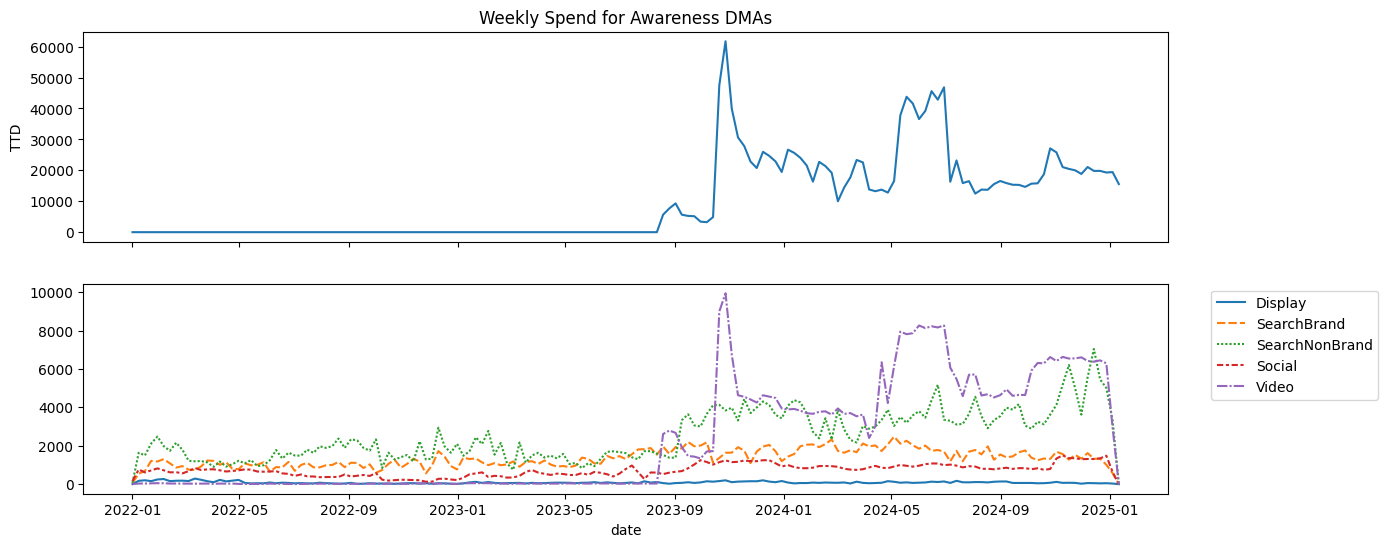

In [108]:
df_gr = df_spend_weekly.loc[:,'awareness'][:-1]

fig, axes = plt.subplots(2,1, figsize=(14,6), sharex=True)
sns.lineplot(data=df_gr['TTD'], ax=axes[0])
sns.lineplot(data=df_gr.drop('TTD', axis=1), ax=axes[1])
axes[0].set_title('Weekly Spend for Awareness DMAs')
axes[1].legend(bbox_to_anchor=(1.2,1), loc='upper right');

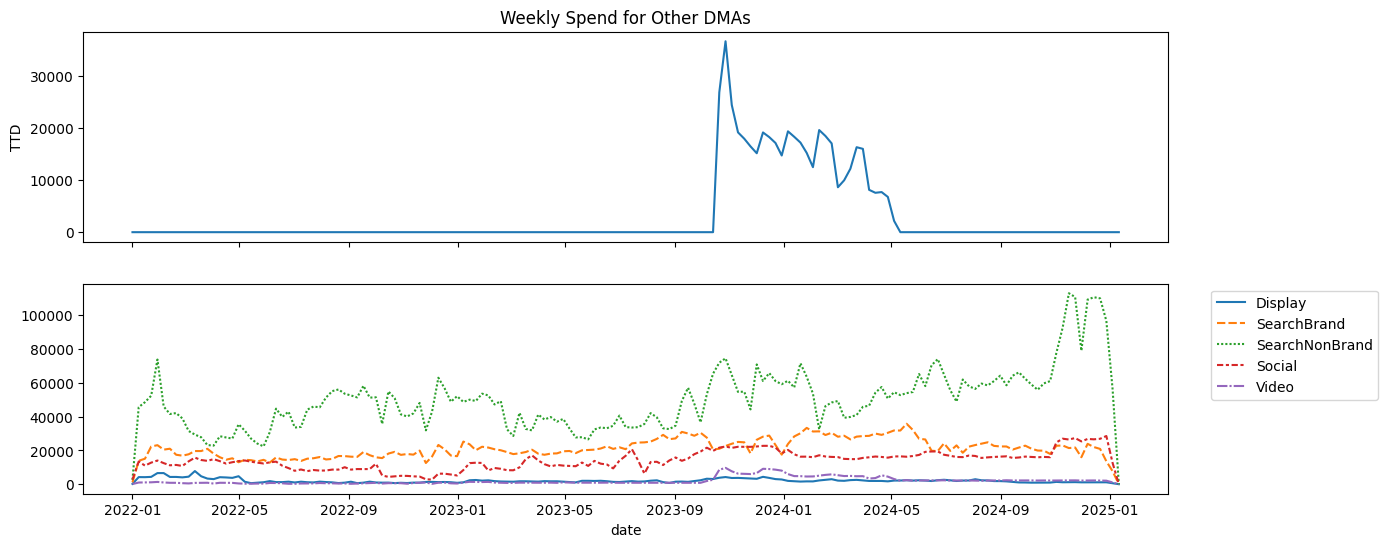

In [107]:
df_gr = df_spend_weekly.loc[:,'other'][:-1]

fig, axes = plt.subplots(2,1, figsize=(14,6), sharex=True)
sns.lineplot(data=df_gr['TTD'], ax=axes[0])
sns.lineplot(data=df_gr.drop('TTD', axis=1), ax=axes[1])
axes[0].set_title('Weekly Spend for Other DMAs')
axes[1].legend(bbox_to_anchor=(1.2,1), loc='upper right');

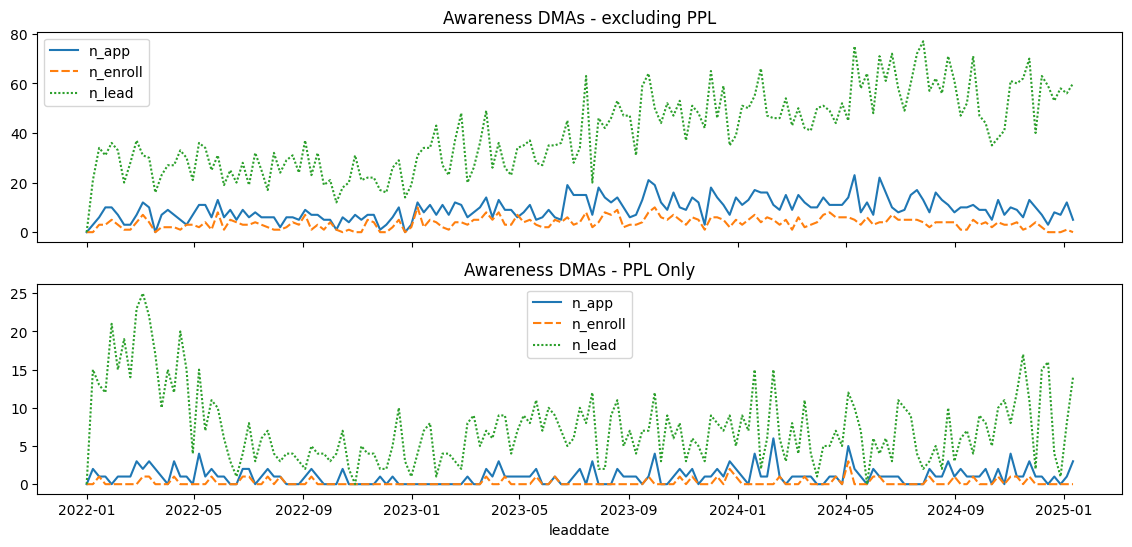

In [105]:
fig, axes = plt.subplots(2,1, figsize=(14,6), sharex=True)
sns.lineplot(data=df_kpi_cohort_weekly.loc[:, ('awareness', 'ALL(No PPL,Referral)')], ax=axes[0])
sns.lineplot(data=df_kpi_cohort_weekly.loc[:, ('awareness', 'PPL')], ax=axes[1])
axes[0].set_title('Awareness DMAs - excluding PPL')
axes[1].set_title('Awareness DMAs - PPL Only');

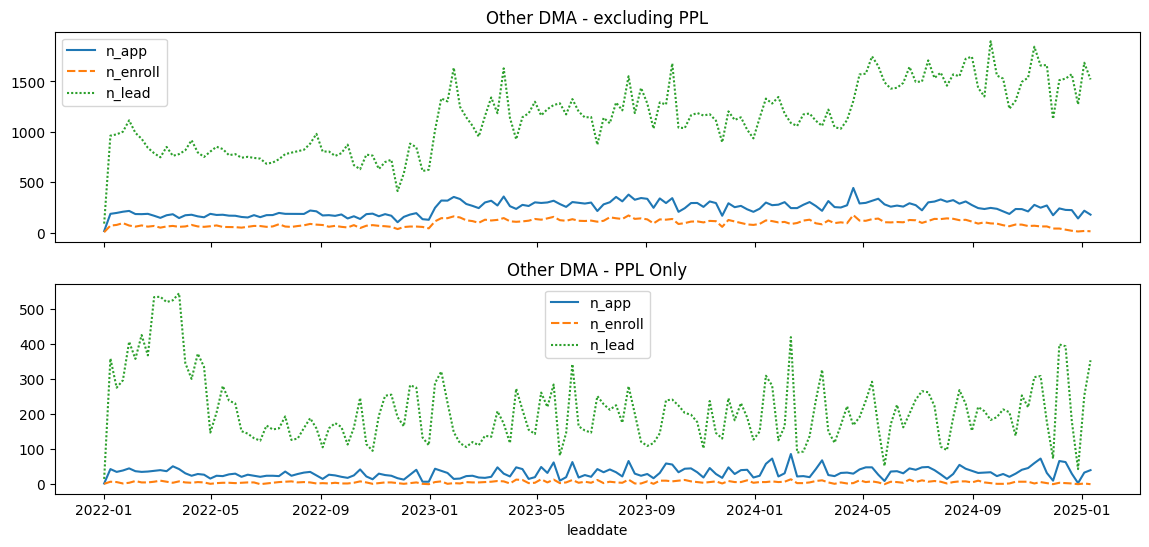

In [106]:
fig, axes = plt.subplots(2,1, figsize=(14,6), sharex=True)
sns.lineplot(data=df_kpi_cohort_weekly.loc[:, ('other', 'ALL(No PPL,Referral)')], ax=axes[0])
sns.lineplot(data=df_kpi_cohort_weekly.loc[:, ('other', 'PPL')], ax=axes[1])
axes[0].set_title('Other DMA - excluding PPL')
axes[1].set_title('Other DMA - PPL Only');